<a href="https://colab.research.google.com/github/rahatarinasir/house_price_prediction/blob/main/Divar_House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **import libraries**

In [37]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Specify the path to your CSV file in Google Drive
csv_path = '/content/drive/MyDrive/dataset/Final3.csv'

# Read the CSV file using pandas
data = pd.read_csv(csv_path)

# Print the data
print(data.head())

   Unnamed: 0 metraj Sale Sakht otagh        location        price floor
0           0     ۸۷       ۱۴۰۰     ۲        مرزداران  ۱۳۹۲۰۰۰۰۰۰۰    ۷ 
1           1     ۹۸       ۱۳۹۷     ۲       کوی فردوس  ۱۰۶۰۰۰۰۰۰۰۰     ۵
2           2     ۶۰       ۱۳۹۶     ۱    ابراهیم‌آباد   ۱۵۶۰۰۰۰۰۰۰    ۱ 
3           3     ۸۷       ۱۳۹۴     ۲   سازمان برنامه   ۹۵۰۰۰۰۰۰۰۰     ۳
4           4    ۱۷۰       ۱۳۷۵     ۳         فرمانیه  ۳۴۰۰۰۰۰۰۰۰۰     ۲


## cleaning data
 FIND TYPE OF DATA COLUMNS WITH FUNCTION.
**num_cols**, **ordinals**, **cat_cols**

In [39]:
def find_col_dtypes(data, ord_th):
    num_cols = data.select_dtypes("number").columns.to_list()
    cat_cols = data.select_dtypes("object").columns.to_list()

    ordinals = [col for col in num_cols if data[col].nunique() < ord_th]

    num_cols = [col for col in num_cols if col not in ordinals]

    return num_cols, ordinals, cat_cols

# Example usage
data = pd.read_csv(csv_path)

num_cols, ordinals, cat_cols = find_col_dtypes(data, 20)

print(f"Num Cols: {num_cols}", end="\n\n")
print(f"Cat Cols: {cat_cols}", end="\n\n")
print(f"Ordinal Cols: {ordinals}")

Num Cols: ['Unnamed: 0']

Cat Cols: ['metraj', 'Sale Sakht', 'otagh', 'location', 'price', 'floor']

Ordinal Cols: []


In [40]:
import pandas as pd
import re

def convert_to_english(number):
    english_digits = {'۰': '0', '۱': '1', '۲': '2', '۳': '3', '۴': '4', '۵': '5', '۶': '6', '۷': '7', '۸': '8', '۹': '9'}
    english_number = ''
    for digit in number:
        if digit in english_digits:
            english_number += english_digits[digit]
        else:
            english_number += digit
    return english_number

# Read the dataset
data = pd.read_csv(csv_path)  # Replace "csv_path" with your actual dataset path

# Convert numerical columns to English numbers
numerical_columns = ["metraj", "Sale Sakht", "price", "floor","otagh"]
for column in numerical_columns:
    data[column] = data[column].apply(lambda x: convert_to_english(str(x)))

# Print the updated dataset
print(data)

     Unnamed: 0 metraj Sale Sakht otagh                 location        price  \
0             0     87       1400     2                 مرزداران  13920000000   
1             1     98       1397     2                کوی فردوس  10600000000   
2             2     60       1396     1             ابراهیم‌آباد   1560000000   
3             3     87       1394     2            سازمان برنامه   9500000000   
4             4    170       1375     3                  فرمانیه  34000000000   
..          ...    ...        ...   ...                      ...          ...   
831         831    133       1381     3                    ایران  10600000000   
832         832     89       1400     2         مبارک‌آباد بهشتی   2403000000   
833         833     75       1399     2             شهرک راه‌آهن   7600000000   
834         834     50       1391     1   دریاچه شهدای خلیج فارس   1500000000   
835         835     85       1387     2                    ولنجک  16200000000   

    floor  
0      7   
1  

In [41]:
data.duplicated().sum()

0

## EDA

In [42]:
import pandas as pd

def convert_to_billion(number):
    billion_number = number / 1_000_000_000
    return billion_number



# Convert "price" column to numeric type
data["price"] = pd.to_numeric(data["price"], errors="coerce")

# Convert price column to billions
data["price"] = data["price"].apply(lambda x: convert_to_billion(x))

# Print the updated dataset
print(data)

     Unnamed: 0 metraj Sale Sakht otagh                 location   price floor
0             0     87       1400     2                 مرزداران  13.920    7 
1             1     98       1397     2                کوی فردوس  10.600     5
2             2     60       1396     1             ابراهیم‌آباد   1.560    1 
3             3     87       1394     2            سازمان برنامه   9.500     3
4             4    170       1375     3                  فرمانیه  34.000     2
..          ...    ...        ...   ...                      ...     ...   ...
831         831    133       1381     3                    ایران  10.600    5 
832         832     89       1400     2         مبارک‌آباد بهشتی   2.403     2
833         833     75       1399     2             شهرک راه‌آهن   7.600     1
834         834     50       1391     1   دریاچه شهدای خلیج فارس   1.500    2 
835         835     85       1387     2                    ولنجک  16.200     9

[836 rows x 7 columns]


In [43]:
data["price"] = pd.to_numeric(data["price"], errors='coerce')
data["price"].quantile([0, 0.25, 0.50, 0.75, 0.99])

0.00      0.600
0.25      4.500
0.50     10.000
0.75     18.085
0.99    103.250
Name: price, dtype: float64

This output tells us the values at different quantiles of the "price" column. For instance, we can interpret that:


*   The **minimum **value (**0th percentile**) of the "SalePrice" column is  0.600T.

*   **25% of the houses** have a sale price below or equal to 4.500T.

*   **The median (50th percentile**) sale price is 10.000T.

*   **75% of the houses** have a sale price below or equal to 18.085T.

*   **Only the top 1% **of houses have a sale price above 103.250T.

(T=TOMAN)















In [44]:
import numpy as np

data["SalePrice_Range"] = pd.cut(data["price"],
                                 bins=np.array([-np.inf, 100, 150, 200, np.inf])*1000,
                                 labels=["0-5","5-10","10-20","50+"])

([0, 1, 2, 3, 4],
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '1'),
  Text(3, 0, '4'),
  Text(4, 0, '0')])

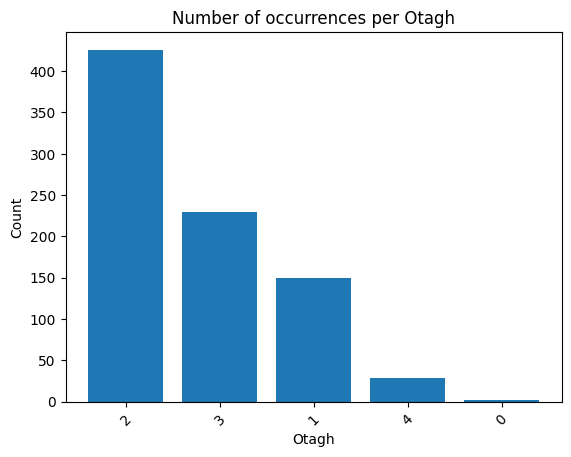

In [45]:
import matplotlib.pyplot as plt

# Group the data by "otagh" and count the occurrences
otagh_counts = data['otagh'].value_counts()

# Create a bar chart
plt.bar(otagh_counts.index, otagh_counts.values)

# Customize the chart
plt.xlabel('Otagh')
plt.ylabel('Count')
plt.title('Number of occurrences per Otagh')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

In [46]:

# Replace non-numeric values with NaN in "metraj" column
data['metraj'] = pd.to_numeric(data['metraj'], errors='coerce')

# Create a new column "area_rang" based on "metraj" column
data['area_rang'] = pd.cut(data['metraj'], bins=[0, 50, 100, 200, float('inf')], labels=['0_50', '50_100', '100-200', '200+'], include_lowest=True)

# Convert "area_rang" column to categorical data type
data['area_rang'] = data['area_rang'].astype('category')

# Print the updated dataset
print(data)

     Unnamed: 0  metraj Sale Sakht otagh                 location   price  \
0             0      87       1400     2                 مرزداران  13.920   
1             1      98       1397     2                کوی فردوس  10.600   
2             2      60       1396     1             ابراهیم‌آباد   1.560   
3             3      87       1394     2            سازمان برنامه   9.500   
4             4     170       1375     3                  فرمانیه  34.000   
..          ...     ...        ...   ...                      ...     ...   
831         831     133       1381     3                    ایران  10.600   
832         832      89       1400     2         مبارک‌آباد بهشتی   2.403   
833         833      75       1399     2             شهرک راه‌آهن   7.600   
834         834      50       1391     1   دریاچه شهدای خلیج فارس   1.500   
835         835      85       1387     2                    ولنجک  16.200   

    floor SalePrice_Range area_rang  
0      7              0-5    50_100  

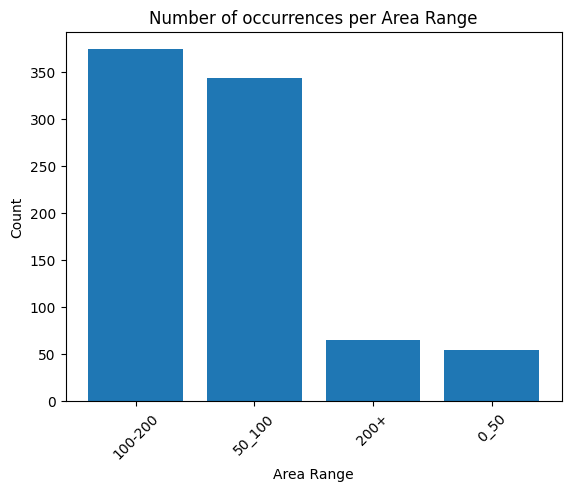

In [47]:

# Group the data by "area_rang" and count the occurrences
area_rang_counts = data['area_rang'].value_counts()

# Create a bar chart
plt.bar(area_rang_counts.index, area_rang_counts.values)

# Customize the chart
plt.xlabel('Area Range')
plt.ylabel('Count')
plt.title('Number of occurrences per Area Range')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the chart
plt.show()

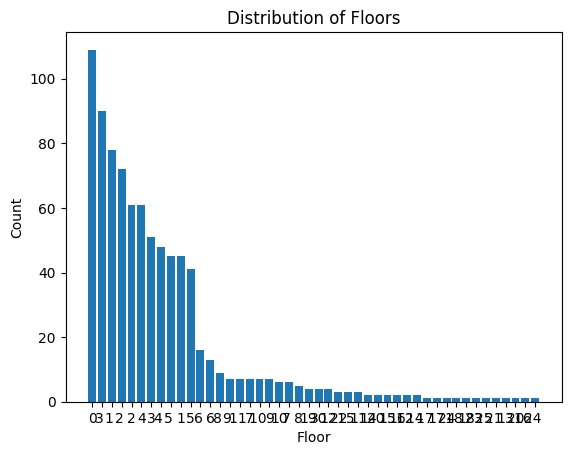

In [48]:
# Group the data by "floor" and count the occurrences
floor_counts = data['floor'].value_counts()

# Create a bar chart
plt.bar(floor_counts.index, floor_counts.values)

# Customize the chart
plt.xlabel('Floor')
plt.ylabel('Count')
plt.title('Distribution of Floors')

# Show the chart
plt.show()

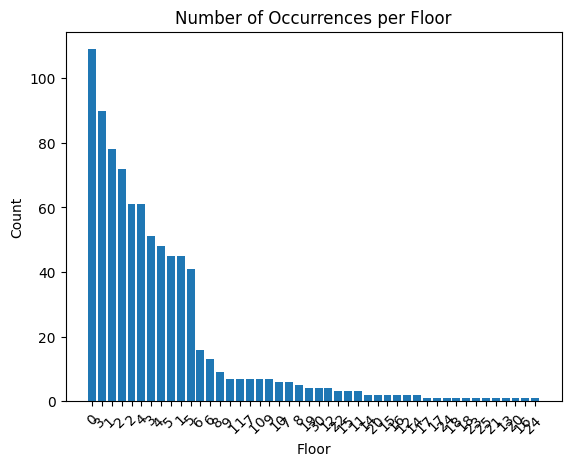

In [49]:
# Group the data by "floor" and count the occurrences
floor_counts = data['floor'].value_counts()

# Create a bar chart
plt.bar(floor_counts.index, floor_counts.values)

# Customize the chart
plt.xlabel('Floor')
plt.ylabel('Count')
plt.title('Number of Occurrences per Floor')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Show the chart
plt.show()

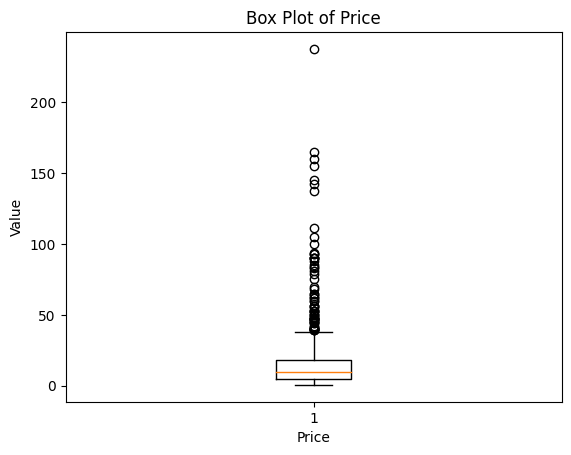

In [50]:
# Create a box plot
plt.boxplot(data['price'])

# Customize the chart
plt.xlabel('Price')
plt.ylabel('Value')
plt.title('Box Plot of Price')

# Show the chart
plt.show()


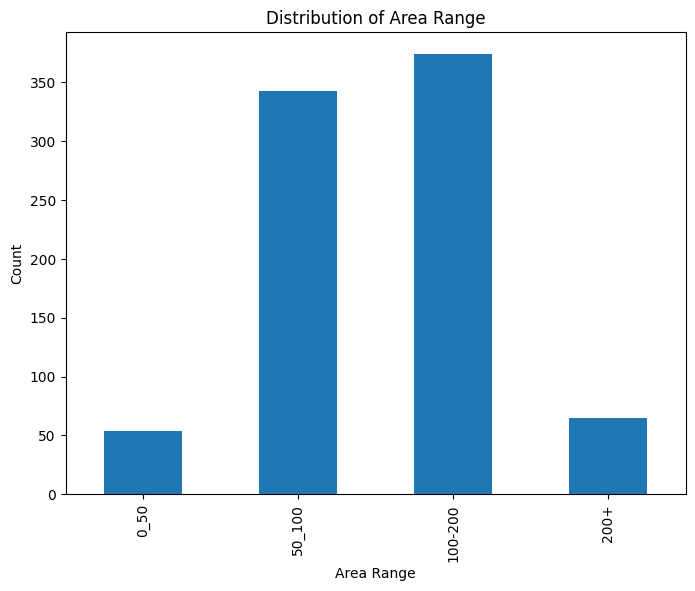

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace non-numeric values with NaN in "metraj" column
data['metraj'] = pd.to_numeric(data['metraj'], errors='coerce')

# Create a new column "area_rang" based on "metraj" column
data['area_rang'] = pd.cut(data['metraj'], bins=[0, 50, 100, 200, float('inf')], labels=['0_50', '50_100', '100-200', '200+'], include_lowest=True)

# Convert "area_rang" column to categorical data type
data['area_rang'] = data['area_rang'].astype('category')

# Plotting a bar chart of "area_rang" distribution
plt.figure(figsize=(8, 6))
data['area_rang'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Area Range')
plt.ylabel('Count')
plt.title('Distribution of Area Range')
plt.show()

In [52]:
import pandas as pd

# Convert "Sale Sakht" column to numeric
data['Sale Sakht'] = pd.to_numeric(data['Sale Sakht'], errors='coerce')

# Define the range-year categories
min_year = data['Sale Sakht'].min()
max_year = data['Sale Sakht'].max()
year_range = list(range(min_year, max_year + 1, 5))
year_range.append(max_year)

# Create a new column "range-year" based on "Sale Sakht" column
data['range-year'] = pd.cut(data['Sale Sakht'], bins=year_range, labels=range(len(year_range) - 1))

# Convert "range-year" column to categorical data type
data['range-year'] = data['range-year'].astype('category')

# Print the updated dataset with the new "range-year" column
print(data)

     Unnamed: 0  metraj  Sale Sakht otagh                 location   price  \
0             0      87        1400     2                 مرزداران  13.920   
1             1      98        1397     2                کوی فردوس  10.600   
2             2      60        1396     1             ابراهیم‌آباد   1.560   
3             3      87        1394     2            سازمان برنامه   9.500   
4             4     170        1375     3                  فرمانیه  34.000   
..          ...     ...         ...   ...                      ...     ...   
831         831     133        1381     3                    ایران  10.600   
832         832      89        1400     2         مبارک‌آباد بهشتی   2.403   
833         833      75        1399     2             شهرک راه‌آهن   7.600   
834         834      50        1391     1   دریاچه شهدای خلیج فارس   1.500   
835         835      85        1387     2                    ولنجک  16.200   

    floor SalePrice_Range area_rang range-year  
0      7      

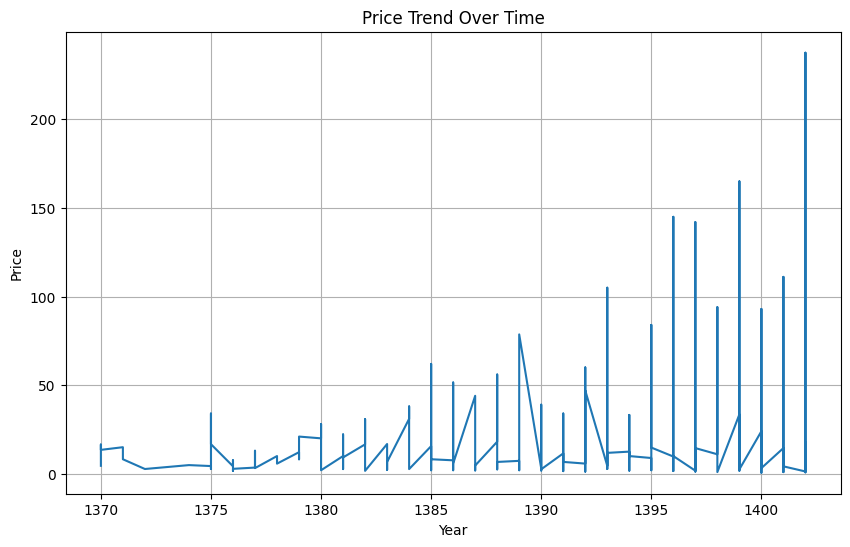

In [53]:
import matplotlib.pyplot as plt

# Convert "price" column to numeric
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Sort the data by the "Sale" column
data = data.sort_values('Sale Sakht')

# Create a line plot of price over time
plt.figure(figsize=(10, 6))
plt.plot(data['Sale Sakht'], data['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price Trend Over Time')
plt.grid(True)
plt.show()

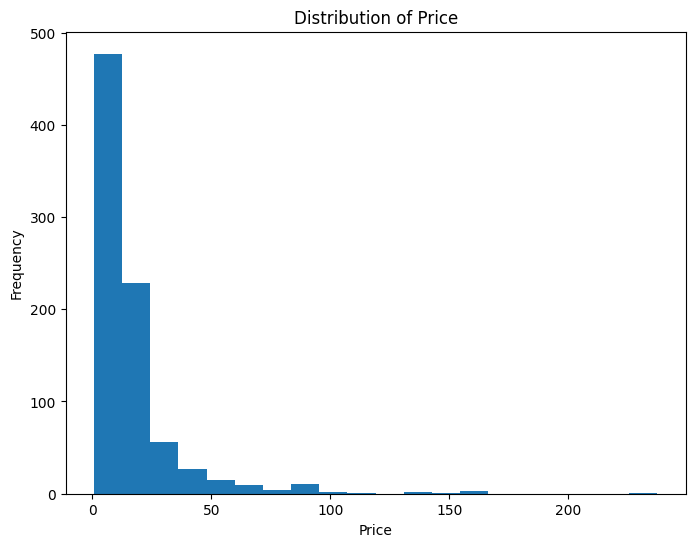

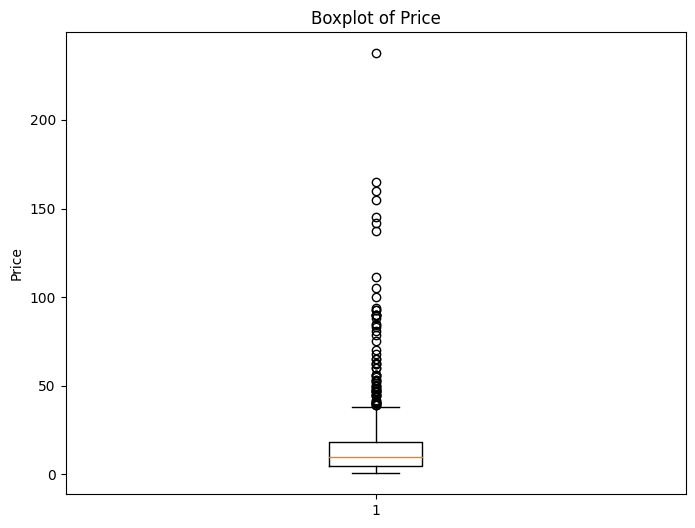

In [54]:
import matplotlib.pyplot as plt

# Convert "price" column to numeric
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Plotting a histogram of price distribution
plt.figure(figsize=(8, 6))
plt.hist(data['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

# Alternatively, you can use a boxplot to visualize the price distribution
plt.figure(figsize=(8, 6))
plt.boxplot(data['price'])
plt.ylabel('Price')
plt.title('Boxplot of Price')
plt.show()

<ipython-input-55-41cf7f078a70>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = subset_data.corr()


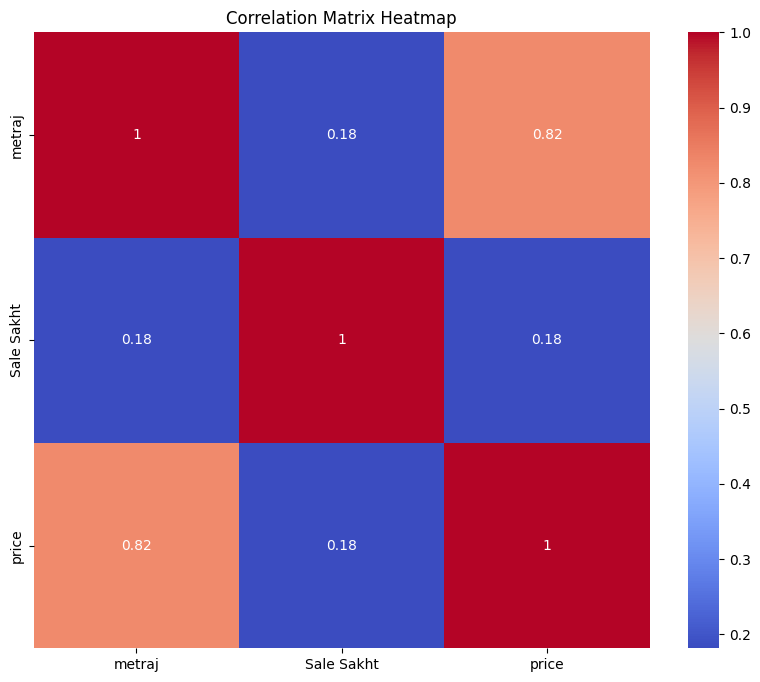

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the specific columns of interest
selected_columns = ["metraj", "Sale Sakht", "price", "floor", "otagh"]

# Create a subset of data with the selected columns
subset_data = data[selected_columns]

# Compute the correlation matrix
corr_matrix = subset_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## **outliner_detector**

In [56]:
def outliner_detector(df, cols, take_care_outliners=False, print_outliners=False, q_1=0.25, q_3=0.75):
    temp = pd.DataFrame()
    data = df.copy()
    for col in cols:
        q1 = data[col].quantile(q_1)
        q3 = data[col].quantile(q_3)
        IQR = q3 - q1
        up = q3 + 1.5 * IQR
        low = q1 - 1.5 * IQR
        temp.loc[col, "Min"] = round(data[col].min())
        temp.loc[col, "Low_Limit"] = round(low)
        temp.loc[col, "Mean"] = round(data[col].mean())
        temp.loc[col, "Median"] = round(data[col].median())
        temp.loc[col,"Up_Limit"] = up
        temp.loc[col, "Max"] = data[col].max()
        temp.loc[col, "Outliner"] = "Min-Max-Outliner" if (data[col].max() > up) & (low > data[col].min())\
                                    else ("Max-Outliner" if data[col].max() > up \
                                    else ("Min-Outliner" if low > data[col].min() \
                                    else "No"))
        if take_care_outliners:
            data.loc[data[col] > up,col] = round(up-1)
            data.loc[data[col] < low,col] = round(low-1)
    if take_care_outliners:
        if print_outliners: return temp
        return data
    if print_outliners: return temp

In [57]:
outliner_detector(data, num_cols, print_outliners=True, q_1=0.01, q_3=0.99)

,Min,Low_Limit,Mean,Median,Up_Limit,Max,Outliner
Unnamed: 0,0.0,-1219.0,418.0,418.0,2054.1,835.0,No


In [58]:
# Check for missing values in all columns
missing_values = data.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

Unnamed: 0          0
metraj              0
Sale Sakht          0
otagh               0
location            0
price               0
floor               0
SalePrice_Range     0
area_rang           0
range-year         11
dtype: int64


In [59]:
df = outliner_detector(data, num_cols, take_care_outliners= True, print_outliners=False, q_1=0.01, q_3=0.99)
outliner_detector(df, num_cols, print_outliners=True, q_1=0.01, q_3=0.99)

,Min,Low_Limit,Mean,Median,Up_Limit,Max,Outliner
Unnamed: 0,0.0,-1219.0,418.0,418.0,2054.1,835.0,No


In [60]:
df["location"].value_counts() / len(df) * 100

 سعادت‌آباد                5.622010
 پاسداران                  4.425837
 پونک                      3.947368
 دریاچه شهدای خلیج فارس    3.349282
 مبارک‌آباد بهشتی          3.229665
                             ...   
 ایوانک                    0.119617
 نعمت‌آباد                 0.119617
 المهدی                    0.119617
 فردوسی                    0.119617
 اوقاف                     0.119617
Name: location, Length: 172, dtype: float64

In [61]:
print(df)

     Unnamed: 0  metraj  Sale Sakht otagh                 location  price  \
740         740      86        1370     2                دولت‌آباد    4.5   
220         220     110        1370     2                     جهاد    8.8   
281         281      85        1370     2                   شمشیری    4.5   
696         696      90        1370     2                     چیذر   10.8   
485         485     168        1370     2                عباس‌آباد   16.5   
..          ...     ...         ...   ...                      ...    ...   
268         268     112        1402     2                 سرو آزاد   10.0   
681         681     100        1402     2                 مرزداران   18.0   
257         257     143        1402     3                 شهرک غرب   27.0   
360         360     118        1402     2   دریاچه شهدای خلیج فارس    8.5   
417         417     120        1402     2           جنت‌آباد جنوبی   17.5   

    floor SalePrice_Range area_rang range-year  
740     0             0-5 

In [62]:
def drop_feature(data,columns, percentage):
    data = data.copy()
    new_cat_cols=[]
    for col in columns:
        rank_1 = (data[col].value_counts().sort_values(ascending=False) / len(data)*100).iloc[0]
        if rank_1 > percentage:
            print(f"Feature {col} is Nonsense, Dropped")
            data.drop(col, axis=1, inplace=True)
        else:
            new_cat_cols.append(col)
    return data, new_cat_cols

df, new_cat_cols = drop_feature(df,cat_cols,percentage = 95)

In [63]:
print(df)

     Unnamed: 0  metraj  Sale Sakht otagh                 location  price  \
740         740      86        1370     2                دولت‌آباد    4.5   
220         220     110        1370     2                     جهاد    8.8   
281         281      85        1370     2                   شمشیری    4.5   
696         696      90        1370     2                     چیذر   10.8   
485         485     168        1370     2                عباس‌آباد   16.5   
..          ...     ...         ...   ...                      ...    ...   
268         268     112        1402     2                 سرو آزاد   10.0   
681         681     100        1402     2                 مرزداران   18.0   
257         257     143        1402     3                 شهرک غرب   27.0   
360         360     118        1402     2   دریاچه شهدای خلیج فارس    8.5   
417         417     120        1402     2           جنت‌آباد جنوبی   17.5   

    floor SalePrice_Range area_rang range-year  
740     0             0-5 

In [64]:
df["otagh"].value_counts() / len(df) * 100

2    50.956938
3    27.511962
1    17.822967
4     3.468900
0     0.239234
Name: otagh, dtype: float64

In [65]:
df["area_rang"].value_counts() / len(df) * 100

100-200    44.736842
50_100     41.028708
200+        7.775120
0_50        6.459330
Name: area_rang, dtype: float64

In [66]:
cat_cols = ['location']
df_encoded = pd.get_dummies(df, columns=cat_cols)

In [67]:
print(df_encoded)

     Unnamed: 0  metraj  Sale Sakht otagh  price floor SalePrice_Range  \
740         740      86        1370     2    4.5     0             0-5   
220         220     110        1370     2    8.8     2             0-5   
281         281      85        1370     2    4.5     0             0-5   
696         696      90        1370     2   10.8    3              0-5   
485         485     168        1370     2   16.5     0             0-5   
..          ...     ...         ...   ...    ...   ...             ...   
268         268     112        1402     2   10.0     0             0-5   
681         681     100        1402     2   18.0     1             0-5   
257         257     143        1402     3   27.0    2              0-5   
360         360     118        1402     2    8.5   25              0-5   
417         417     120        1402     2   17.5     3             0-5   

    area_rang range-year  location_ آبشار  ...  location_ کاشانک  \
740    50_100        NaN                0  

# **statistics**

In [68]:
# Check data types of columns
print(df.dtypes)

Unnamed: 0            int64
metraj                int64
Sale Sakht            int64
otagh                object
location             object
price               float64
floor                object
SalePrice_Range    category
area_rang          category
range-year         category
dtype: object


In [69]:
import scipy.stats as stats

# Convert 'metraj' column to numeric
df['metraj'] = df['metraj'].astype(int)

# Calculate p-value and correlation coefficient for each variable
variables = ['metraj', 'Sale Sakht']
for variable in variables:
    p_value = stats.pearsonr(df[variable], df['price'])[1]
    correlation_coefficient = stats.pearsonr(df[variable], df['price'])[0]
    print(f"Variable: {variable}\nP-value: {p_value}\nCorrelation Coefficient: {correlation_coefficient}\n")

# Calculate correlation matrix
correlation_matrix = df[variables + ['price']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Variable: metraj
P-value: 2.3972694261414025e-208
Correlation Coefficient: 0.8243988369081064

Variable: Sale Sakht
P-value: 1.2374650654612167e-07
Correlation Coefficient: 0.18163339384409916

Correlation Matrix:
              metraj  Sale Sakht     price
metraj      1.000000    0.181937  0.824399
Sale Sakht  0.181937    1.000000  0.181633
price       0.824399    0.181633  1.000000


P-value: The range of the p-value is from 0 to 1. A p-value close to 0 indicates strong evidence against the null hypothesis, suggesting a significant correlation between the variables. In this case, both variables 'metraj' and 'Sale Sakht' have extremely low p-values (2.3972694261414025e-208 and 1.2374650654612167e-07, respectively), indicating highly significant correlations.

Correlation Coefficient: The range of the correlation coefficient is from -1 to 1. A correlation coefficient close to -1 or 1 indicates a strong linear relationship, while a value close to 0 suggests a weak or no linear relationship. In this case, the 'metraj' variable has a correlation coefficient of 0.8244, indicating a strong positive correlation with 'price'. The 'Sale Sakht' variable has a correlation coefficient of 0.1816, suggesting a relatively weak positive correlation.

Therefore, both the p-values and correlation coefficients indicate significant relationships between the variables, with 'metraj' showing a stronger correlation with 'price' compared to 'Sale Sakht'.

Correlation Coefficient: 0.031230380434199224
P-value: 0.36713461803625913


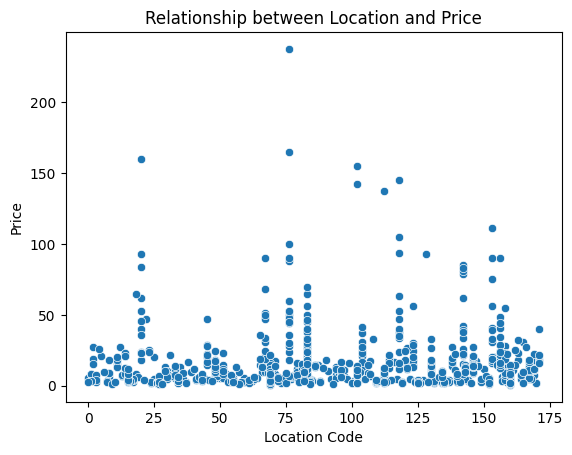

In [70]:
from scipy.stats import pearsonr
# Convert 'location' to numeric codes
df['location_code'] = df['location'].astype('category').cat.codes

# Calculate correlation coefficient
correlation, p_value = pearsonr(df['location_code'], df['price'])
print("Correlation Coefficient:", correlation)
print("P-value:", p_value)

# Visualize the relationship using a scatter plot
sns.scatterplot(data=df, x='location_code', y='price')
plt.xlabel('Location Code')
plt.ylabel('Price')
plt.title('Relationship between Location and Price')
plt.show()

The correlation coefficient measures the strength and direction of the linear relationship between two variables. In this case, the correlation coefficient between the 'location_code' and 'price' variables is approximately 0.031.

A correlation coefficient close to 0 indicates a weak linear relationship between the variables. In this case, the value suggests that there is little to no linear relationship between the numerical codes assigned to the locations and the prices of the properties.

The p-value associated with the correlation coefficient is approximately 0.367. The p-value represents the probability of observing a correlation as extreme as the one calculated, assuming there is no true correlation in the population.

In this case, the p-value is greater than the commonly used significance level of 0.05. This suggests that there is not enough evidence to reject the null hypothesis, which states that there is no significant correlation between the 'location_code' and 'price' variables.

In summary, based on the correlation coefficient close to 0 and the p-value above the significance level, we can conclude that there is no significant linear relationship between the numerical codes assigned to the locations and the prices of the properties in the dataset.

Remember that correlation coefficient values close to -1 or 1 indicate a strong negative or positive linear relationship, respectively. Values close to 0 indicate no significant linear relationship. However, it's important to note that correlation coefficient only measures linear relationships and does not capture other types of relationships or dependencies between variables.

## **modeling**

**split**

In [71]:
print(df)


     Unnamed: 0  metraj  Sale Sakht otagh                 location  price  \
740         740      86        1370     2                دولت‌آباد    4.5   
220         220     110        1370     2                     جهاد    8.8   
281         281      85        1370     2                   شمشیری    4.5   
696         696      90        1370     2                     چیذر   10.8   
485         485     168        1370     2                عباس‌آباد   16.5   
..          ...     ...         ...   ...                      ...    ...   
268         268     112        1402     2                 سرو آزاد   10.0   
681         681     100        1402     2                 مرزداران   18.0   
257         257     143        1402     3                 شهرک غرب   27.0   
360         360     118        1402     2   دریاچه شهدای خلیج فارس    8.5   
417         417     120        1402     2           جنت‌آباد جنوبی   17.5   

    floor SalePrice_Range area_rang range-year  location_code  
740     0  

       Unnamed: 0      metraj   Sale Sakht       price  location_ آبشار  \
count  836.000000  836.000000   836.000000  836.000000       836.000000   
mean   417.500000  117.248804  1393.556220   16.041502         0.002392   
std    241.476707   73.209144     7.958602   21.330769         0.048882   
min      0.000000   20.000000  1370.000000    0.600000         0.000000   
25%    208.750000   72.000000  1387.000000    4.500000         0.000000   
50%    417.500000  103.500000  1395.000000   10.000000         0.000000   
75%    626.250000  137.000000  1401.000000   18.085000         0.000000   
max    835.000000  980.000000  1402.000000  237.600000         1.000000   

       location_ آبشار تهران  location_ آجودانیه  location_ آذربایجان  \
count             836.000000          836.000000           836.000000   
mean                0.007177            0.003589             0.005981   
std                 0.084463            0.059832             0.077151   
min                 0.000000    

<ipython-input-72-b2ab6845c5a6>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


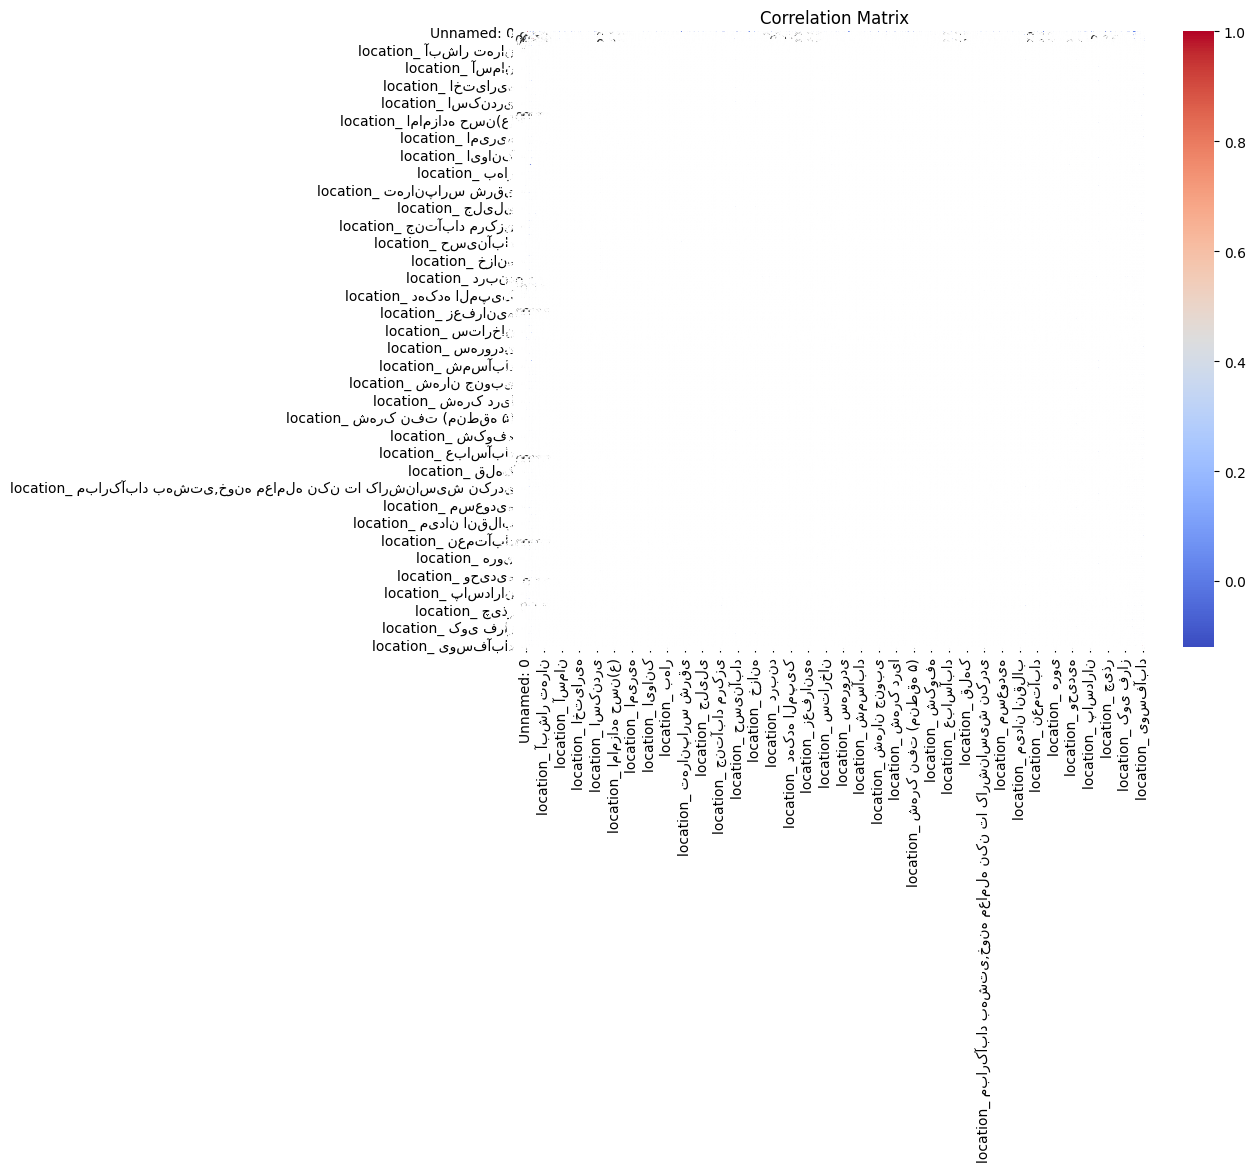

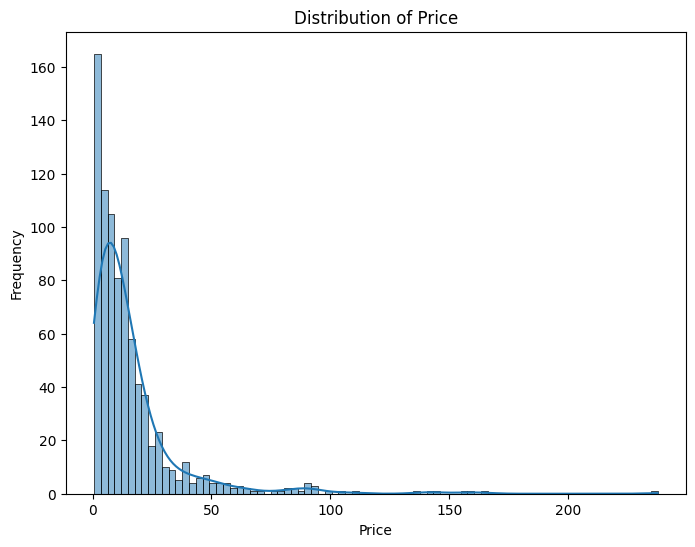

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your encoded dataset is stored in a DataFrame called 'df_encoded'

# Print the summary statistics of the dataset
print(df_encoded.describe())

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize the distribution of a specific column, e.g., 'price'
plt.figure(figsize=(8, 6))
sns.histplot(df_encoded['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [73]:
# Check data types of columns
print(df.dtypes)

Unnamed: 0            int64
metraj                int64
Sale Sakht            int64
otagh                object
location             object
price               float64
floor                object
SalePrice_Range    category
area_rang          category
range-year         category
location_code         int16
dtype: object


In [74]:
# Assuming your dataset is stored in a DataFrame called 'df'
df = df.drop(['location'], axis=1)

In [75]:
print(df)

     Unnamed: 0  metraj  Sale Sakht otagh  price floor SalePrice_Range  \
740         740      86        1370     2    4.5     0             0-5   
220         220     110        1370     2    8.8     2             0-5   
281         281      85        1370     2    4.5     0             0-5   
696         696      90        1370     2   10.8    3              0-5   
485         485     168        1370     2   16.5     0             0-5   
..          ...     ...         ...   ...    ...   ...             ...   
268         268     112        1402     2   10.0     0             0-5   
681         681     100        1402     2   18.0     1             0-5   
257         257     143        1402     3   27.0    2              0-5   
360         360     118        1402     2    8.5   25              0-5   
417         417     120        1402     2   17.5     3             0-5   

    area_rang range-year  location_code  
740    50_100        NaN             73  
220   100-200        NaN   

In [76]:
!pip install persiantools

In [77]:

from persiantools.jdatetime import JalaliDate
import datetime


# Calculate the current Gregorian year
current_gregorian_year = datetime.datetime.now().year

# Convert 'Sale Sakht' to Gregorian year
df['gregorian_year'] = df['Sale Sakht'].apply(lambda x: JalaliDate(int(x), 1, 1).to_gregorian().year)

# Calculate the years since construction
df['years_since_construction'] = current_gregorian_year - df['gregorian_year']


In [78]:
# Drop unnecessary columns
df.drop(['Sale Sakht', 'gregorian_year'], axis=1, inplace=True)




In [79]:
# Count the null values in 'years_since_construction' column
null_count = df['years_since_construction'].isnull().sum()
print("Count of null values in 'years_since_construction':", null_count)

Count of null values in 'years_since_construction': 0


In [80]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df[['metraj', 'otagh', 'years_since_construction', 'floor', 'location_code']]  # Predictor variables
y = df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the coefficients and intercept
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients)
print("Intercept:", model.intercept_)

Mean Squared Error: 204.10415365287082
                   Variable  Coefficient
0                    metraj     0.229167
1                     otagh    -0.418711
2  years_since_construction    -0.112785
3                     floor    -0.339436
4             location_code    -0.003598
Intercept: -7.756666331084054


In [81]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df[['metraj', 'otagh', 'years_since_construction', 'floor', 'location_code']]  # Predictor variables
y = df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 158.6530237374609


## **linear regression**

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
# Create a linear regression model
linear = LinearRegression()

# Fit the model to the training data
linear.fit(X_train, y_train)

# Make predictions on the test data
linear_pred = linear.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of samples in the test set
p = X_test.shape[1]  # Number of predictors
adj_r_squared = 1 - ((1 - r_squared) * (n - 1)) / (n - p - 1)
print(f"Adjusted R-squared: {adj_r_squared}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


R-squared: 0.7639265458566412
Adjusted R-squared: 0.7581119287595142
Mean Absolute Error: 5.700204537128425
Mean Squared Error: 158.6530237374609


**random forest**

In [83]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df[['metraj', 'otagh', 'years_since_construction', 'floor', 'location_code']]  # Predictor variables
y = df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of samples in the test set
p = X_test.shape[1]  # Number of predictors
adj_r_squared = 1 - ((1 - r_squared) * (n - 1)) / (n - p - 1)
print(f"Adjusted R-squared: {adj_r_squared}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

R-squared: 0.7639265458566412
Adjusted R-squared: 0.7581119287595142
Mean Absolute Error: 5.700204537128425
Mean Squared Error: 158.6530237374609


## lasso(l1 regresssion)

In [84]:
from sklearn.linear_model import Lasso
# Create a Lasso regression model
lasso = Lasso(alpha=0.4)  # Adjust the alpha parameter as desired

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
lasso_pred = lasso.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of samples in the test set
p = X_test.shape[1]  # Number of predictors
adj_r_squared = 1 - ((1 - r_squared) * (n - 1)) / (n - p - 1)
print(f"Adjusted R-squared: {adj_r_squared}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

R-squared: 0.7639265458566412
Adjusted R-squared: 0.7581119287595142
Mean Absolute Error: 5.700204537128425
Mean Squared Error: 158.6530237374609


## Ridge regression (l2 regression)

In [85]:
from sklearn.linear_model import Ridge
# Create a Ridge regression model
ridge = Ridge(alpha=1.0)  # Adjust the alpha parameter as desired

# Fit the model to the training data
ridge.fit(X_train, y_train)

# Make predictions on the test data
ridge_pred = ridge.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of samples in the test set
p = X_test.shape[1]  # Number of predictors
adj_r_squared = 1 - ((1 - r_squared) * (n - 1)) / (n - p - 1)
print(f"Adjusted R-squared: {adj_r_squared}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

R-squared: 0.7639265458566412
Adjusted R-squared: 0.7581119287595142
Mean Absolute Error: 5.700204537128425
Mean Squared Error: 158.6530237374609


**lightgbm**

In [86]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Convert 'otagh' and 'floor' columns to numeric data types
df['otagh'] = pd.to_numeric(df['otagh'], errors='coerce')
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')

# Prepare the data
X = df[['metraj', 'otagh', 'years_since_construction', 'floor', 'location_code']]  # Predictor variables
y = df['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the LightGBM Regression model
lgb_model = lgb.LGBMRegressor(objective='root_mean_squared_error')
lgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lgb_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 627, number of used features: 5
[LightGBM] [Info] Start training from score 14.952242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [87]:
# Create and train the LightGBM Regression model with regularization
lgb_model = lgb.LGBMRegressor(objective='root_mean_squared_error',
                              max_depth=5,
                              min_data_in_leaf=10,
                              learning_rate=0.1,
                              feature_fraction=0.8,
                              bagging_fraction=0.8,
                              lambda_l2=0.5)
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, sub

LGBMRegressor(bagging_fraction=0.8, feature_fraction=0.8, lambda_l2=0.5,
              max_depth=5, min_data_in_leaf=10,
              objective='root_mean_squared_error')

**xgboost**

12.478523415885101

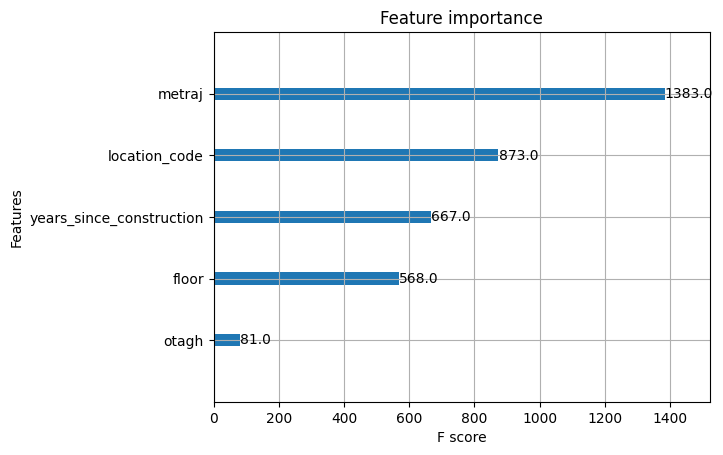

In [88]:
import xgboost
xgb = xgboost.XGBRegressor(objective = 'reg:squarederror')
xgb.fit(X_train, y_train)
xgboost.plot_importance(xgb, max_num_features = 15);
y_pred = xgb.predict(X_test)
mean_squared_error(y_test,y_pred, squared=False)

In [89]:
import pandas as pd
import lightgbm as lgb

# Train the LightGBM model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

# Get feature importances
lgb_importances = pd.DataFrame(dict(lgbm=lgb_model.feature_importances_), index=X.columns)

# Print the feature importances
print(lgb_importances)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 627, number of used features: 5
[LightGBM] [Info] Start training from score 14.952242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

**cat boost regressor**

In [91]:
!pip install catboost

In [92]:
!pip install optuna


In [93]:
from catboost import CatBoostRegressor
import optuna

def objective_cat(trial):
    """Define the objective function"""

    params = {
        'objective': trial.suggest_categorical('objective', ['RMSE']),
        'logging_level': trial.suggest_categorical('logging_level', ['Silent']),
        "random_seed" : trial.suggest_categorical('random_seed', [42]),
        "iterations" : trial.suggest_int("iterations", 500, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15),
        "depth" : trial.suggest_int("depth", 5, 8),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.1, 0.5),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 5, 20),
        'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 1),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',10,30),
        'reg_lambda': trial.suggest_uniform('reg_lambda',50,100),

    }



    model_cat = CatBoostRegressor(**params)
    model_cat.fit(X_train, y_train)
    y_pred = model_cat.predict(X_test)
    return mean_squared_error(y_test,y_pred, squared=False)

In [94]:
study_cat = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_cat.optimize(objective_cat, n_trials=50,show_progress_bar=True)

[I 2023-12-26 14:40:43,351] A new study created in memory with name: no-name-b4db7c2f-9009-4e99-a789-0c3a205ee5bf


  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-93-7639bdcf3082>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 1),
<ipython-input-93-7639bdcf3082>:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',50,100),
<ipython-input-93-7639bdcf3082>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 1),
<ipython-input-93-7639bdcf3082>:19: FutureWarning: suggest_uniform ha

In [95]:
print('Best parameters', study_cat.best_params)

Best parameters {'objective': 'RMSE', 'logging_level': 'Silent', 'random_seed': 42, 'iterations': 1430, 'learning_rate': 0.10256105939321213, 'depth': 5, 'subsample': 0.6212660277318988, 'colsample_bylevel': 0.4622615337507312, 'min_data_in_leaf': 10, 'bagging_temperature': 0.02882950716406814, 'leaf_estimation_iterations': 19, 'reg_lambda': 52.89165949220177}


In [96]:
cat = CatBoostRegressor(**study_cat.best_params)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)

print('MSE_CatBoostRegressor: ', mean_squared_error(y_test,y_pred, squared=False))

MSE_CatBoostRegressor:  12.478523415885101


In [97]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, cat_pred, squared=False)
mae = mean_absolute_error(y_test, cat_pred)
r2 = r2_score(y_test, cat_pred)

# Print evaluation metrics
print('MSE_CatBoostRegressor:', mse)
print('MAE_CatBoostRegressor:', mae)
print('R2 Score_CatBoostRegressor:', r2)

MSE_CatBoostRegressor: 10.757532508766497
MAE_CatBoostRegressor: 4.93973623317676
R2 Score_CatBoostRegressor: 0.8278035732275102


**XGBoost Regressor**

In [98]:
from xgboost import XGBRegressor
import optuna
def objective_xg(trial):
    """Define the objective function"""

    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'max_leaves': trial.suggest_int('max_leaves', 8, 1024),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 400, 1500),
        'min_child_weight': trial.suggest_int('min_child_weight', 10, 20),
        'subsample': trial.suggest_float('subsample', 0.3, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 0.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.3, 0.8),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.01, 0.5),
        "random_state" : trial.suggest_categorical('random_state', [42]),
        'objective': trial.suggest_categorical('objective', ['reg:squarederror']),
        "n_jobs" : trial.suggest_categorical('n_jobs', [-1]),
    }

    model_xgb = XGBRegressor(**params)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    return mean_squared_error(y_test,y_pred, squared=False)

In [99]:
study_xgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgb.optimize(objective_xg, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [100]:
# Print the best parameters
print('Best parameters', study_xgb.best_params)

Best parameters {'booster': 'gbtree', 'max_depth': 10, 'max_leaves': 558, 'learning_rate': 0.03209665898710058, 'n_estimators': 807, 'min_child_weight': 11, 'subsample': 0.7405143765072304, 'reg_alpha': 0.44551753694093893, 'reg_lambda': 0.5700060364747249, 'colsample_bylevel': 0.6157766899490349, 'colsample_bytree': 0.7193958683870113, 'colsample_bynode': 0.025451772193064232, 'random_state': 42, 'objective': 'reg:squarederror', 'n_jobs': -1}


In [101]:
xgb = XGBRegressor(**study_xgb.best_params)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print('Error: ', mean_squared_error(y_test,y_pred, squared=False))
# Calculate evaluation metrics
mse = mean_squared_error(y_test, cat_pred, squared=False)
mae = mean_absolute_error(y_test, cat_pred)
r2 = r2_score(y_test, cat_pred)

# Print evaluation metrics
print('MSE_XGBRegressor:', mse)
print('MAE_XGBRegressor:', mae)
print('R2 Score_XGBRegressor:', r2)

Error:  12.478523415885101
MSE_XGBRegressor: 10.757532508766497
MAE_XGBRegressor: 4.93973623317676
R2 Score_XGBRegressor: 0.8278035732275102


**Voting Regressor**

In [102]:
!pip install sklego

In [106]:
from sklego.linear_model import LADRegression
models = pd.DataFrame()
models["cat"] = cat.predict(X_test)
models["linear"] = linear.predict(X_test)
models["xgb"] = xgb.predict(X_test)

weights = LADRegression().fit(models, y_test).coef_
pd.DataFrame(weights, index = models.columns, columns = ["weights"])

,weights
cat,0.653804
linear,0.176139
xgb,0.208655


In [107]:
from sklearn.ensemble import VotingRegressor
voting = VotingRegressor(estimators=[ ('cat', cat),
                                      ('linear',linear),
                                      ('xgb', xgb)],weights=weights)
voting.fit(X_train,y_train)
voting_pred = voting.predict(X_test)

print('Error: ', mean_squared_error(y_test,y_pred, squared=False))

Error:  12.478523415885101


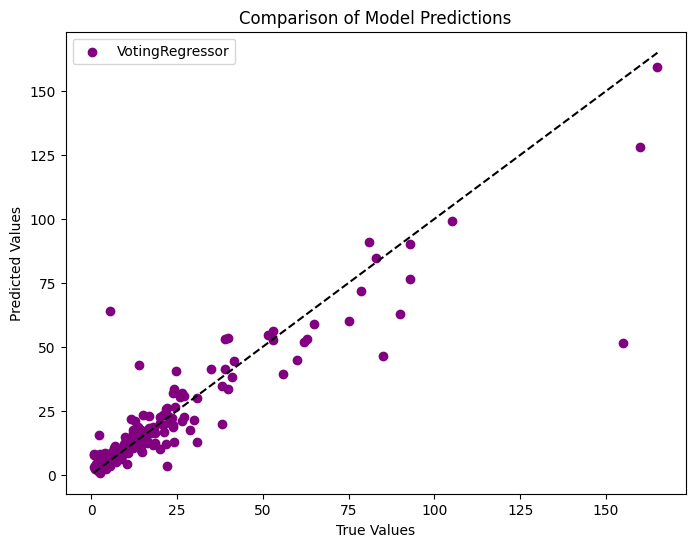

In [108]:
import matplotlib.pyplot as plt

# Assuming you have the predictions of the VotingRegressor model stored in voting_pred

# Create a scatter plot to compare the predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, voting_pred, color='purple', label='VotingRegressor')

# Add labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Model Predictions')

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')

# Add legend
plt.legend()

# Show the plot
plt.show()

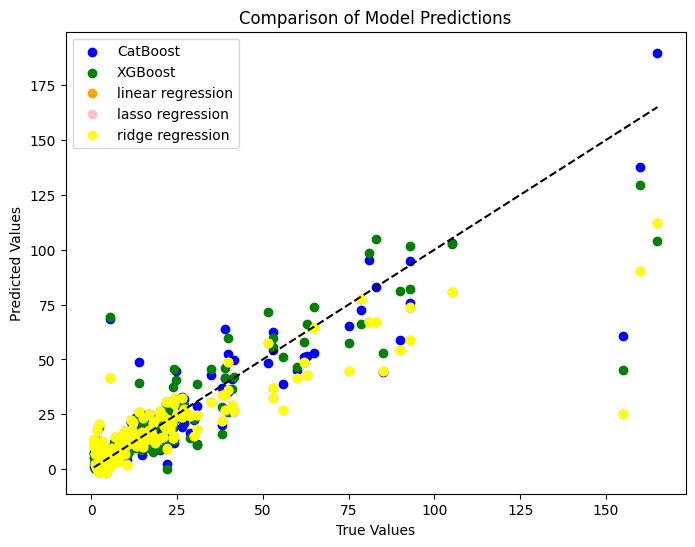

In [109]:
import matplotlib.pyplot as plt

# Assuming you have the predictions of 'cat', 'lgbm', and 'xgb' models stored in separate variables
# For example, cat_pred, lgbm_pred, xgb_pred

# Create a scatter plot to compare the predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, cat_pred, color='blue', label='CatBoost')
#plt.scatter(y_test, lgb_pred, color='red', label='LGBM')
plt.scatter(y_test, xgb_pred, color='green', label='XGBoost')
plt.scatter(y_test, linear_pred, color='orange', label='linear regression')
plt.scatter(y_test, lasso_pred, color='pink', label='lasso regression')
plt.scatter(y_test, ridge_pred, color='yellow', label='ridge regression')

# Add labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Model Predictions')

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')

# Add legend
plt.legend()

# Show the plot
plt.show()

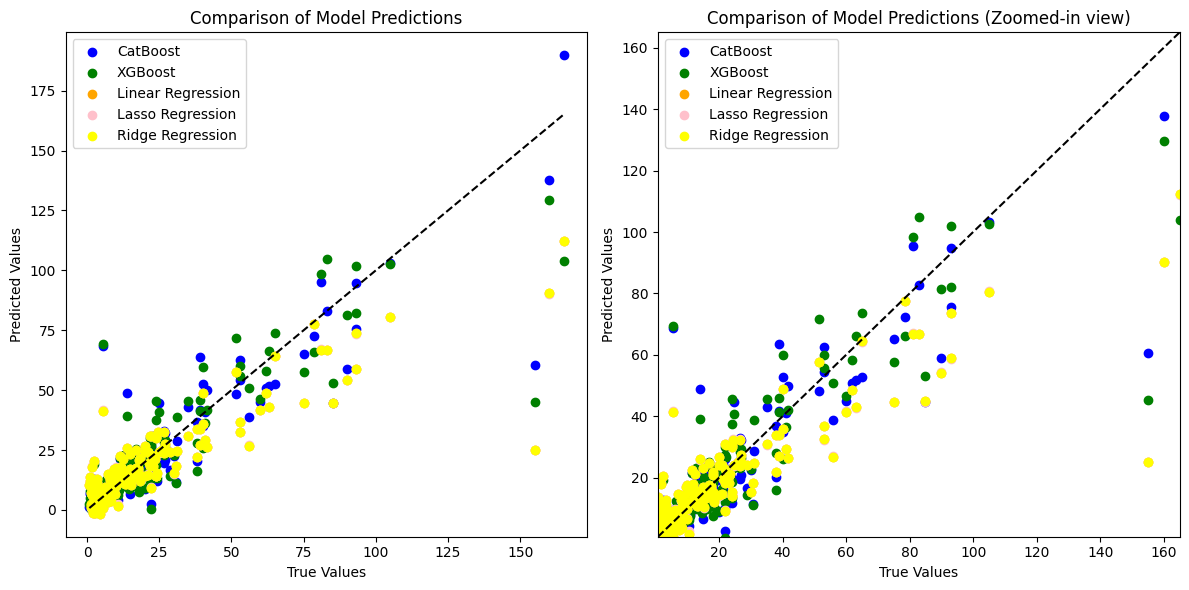

In [110]:
import matplotlib.pyplot as plt

# Assuming you have the predictions of 'cat', 'lgbm', and 'xgb' models stored in separate variables
# For example, cat_pred, lgb_pred, xgb_pred

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot 1 - Comparing CatBoost, LGBM, and XGBoost predictions
ax1.scatter(y_test, cat_pred, color='blue', label='CatBoost')
#ax1.scatter(y_test, lgb_pred, color='red', label='LGBM')
ax1.scatter(y_test, xgb_pred, color='green', label='XGBoost')
ax1.scatter(y_test, linear_pred, color='orange', label='Linear Regression')
ax1.scatter(y_test, lasso_pred, color='pink', label='Lasso Regression')
ax1.scatter(y_test, ridge_pred, color='yellow', label='Ridge Regression')

# Add labels and title to subplot 1
ax1.set_xlabel('True Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Comparison of Model Predictions')

# Add a diagonal line for reference in subplot 1
ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')

# Add legend to subplot 1
ax1.legend()

# Scatter plot 2 - Comparing CatBoost, LGBM, and XGBoost predictions (Zoomed-in view)
ax2.scatter(y_test, cat_pred, color='blue', label='CatBoost')
#ax2.scatter(y_test, lgb_pred, color='red', label='LGBM')
ax2.scatter(y_test, xgb_pred, color='green', label='XGBoost')
ax2.scatter(y_test, linear_pred, color='orange', label='Linear Regression')
ax2.scatter(y_test, lasso_pred, color='pink', label='Lasso Regression')
ax2.scatter(y_test, ridge_pred, color='yellow', label='Ridge Regression')

# Add labels and title to subplot 2
ax2.set_xlabel('True Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('Comparison of Model Predictions (Zoomed-in view)')

# Set limits for the zoomed-in view in subplot 2
ax2.set_xlim([min(y_test), max(y_test)])
ax2.set_ylim([min(y_test), max(y_test)])

# Add a diagonal line for reference in subplot 2
ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')

# Add legend to subplot 2
ax2.legend()

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

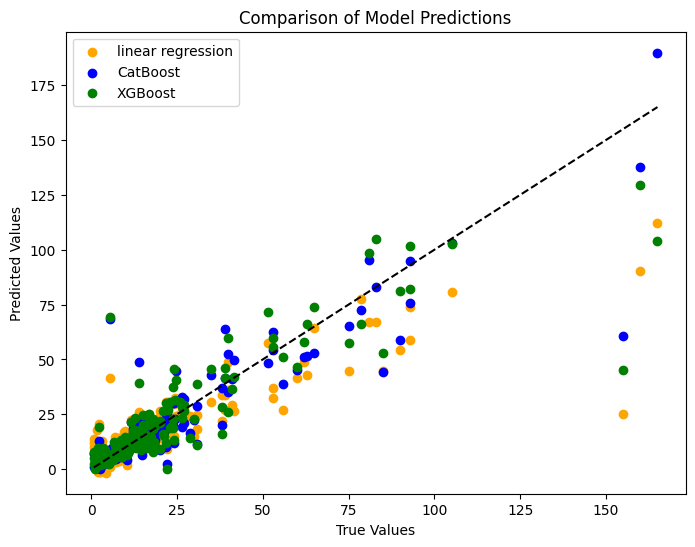

In [111]:
import matplotlib.pyplot as plt

# Assuming you have the predictions of 'cat', 'lgbm', and 'xgb' models stored in separate variables
# For example, cat_pred, lgbm_pred, xgb_pred

# Create a scatter plot to compare the predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_pred, color='orange', label='linear regression')
plt.scatter(y_test, cat_pred, color='blue', label='CatBoost')
plt.scatter(y_test, xgb_pred, color='green', label='XGBoost')

# Add labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Model Predictions')

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')

# Add legend
plt.legend()

# Show the plot
plt.show()

**hypothesis testing **

In [112]:
from sklearn.utils import resample
from scipy.stats import t

# Assuming you have trained the CatBoostRegressor model
cat = CatBoostRegressor(**study_cat.best_params)
cat.fit(X_train, y_train)

# Define the number of bootstrap samples
n_bootstrap = 3

# Perform bootstrapping and hypothesis testing for CatBoostRegressor coefficients
cat_p_values = []
for feature in range(X_train.shape[1]):
    bootstrap_coefs = []
    for _ in range(n_bootstrap):
        # Perform bootstrap sampling with replacement
        X_bootstrap, y_bootstrap = resample(X_train, y_train)

        # Fit the CatBoostRegressor on the bootstrap sample
        cat_bootstrap = CatBoostRegressor(**study_cat.best_params)
        cat_bootstrap.fit(X_bootstrap, y_bootstrap)

        # Get the coefficient for the current feature
        coef = cat_bootstrap.get_feature_importance()[feature]
        bootstrap_coefs.append(coef)

    # Calculate the standard error of the coefficient from the bootstrap samples
    std_error = np.std(bootstrap_coefs)

    # Calculate the t-value and p-value
    t_value = cat.feature_importances_[feature] / std_error
    dof = n_bootstrap - 1
    p_value = 2 * (1 - t.cdf(np.abs(t_value), dof))
    cat_p_values.append(p_value)

# Print the p-values for CatBoostRegressor
print('CatBoostRegressor p-values:', cat_p_values)

CatBoostRegressor p-values: [0.00018419150506288062, 0.011859319909694577, 0.024783730066855192, 0.09946030248125193, 0.02214410889650731]


## svr

In [113]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Train the SVM model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Make predictions using the SVM model
svm_preds = svm_model.predict(X_test)

# Calculate the mean squared error of the SVM model
svm_mse = mean_squared_error(y_test, svm_preds)
print("SVM Mean Squared Error:", svm_mse)

# Train the XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions using the XGBoost model
xgb_svr_preds = xgb_model.predict(X_test)

# Calculate the mean squared error of the XGBoost model
xgb_mse = mean_squared_error(y_test, xgb_svr_preds)
print("XGBoost Mean Squared Error:", xgb_mse)

SVM Mean Squared Error: 457.84507688506676
XGBoost Mean Squared Error: 155.7135466407928


## svr_CatBoostRegressor

In [126]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import optuna

def objective_catboost(trial):
    """Define the objective function for CatBoostRegressor"""

    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
        'random_state': trial.suggest_categorical('random_state', [42]),
        'loss_function': trial.suggest_categorical('loss_function', ['RMSE']),
        'eval_metric': trial.suggest_categorical('eval_metric', ['RMSE']),
    }

    model_catboost = CatBoostRegressor(**params)
    model_catboost.fit(X_train, y_train)
    y_pred = model_catboost.predict(X_test)

    # Save the trained model
    model_catboost.save_model('/content/drive/MyDrive/optimum_model.cbm')
    return mean_squared_error(y_test, y_pred, squared=False)

# Optimize CatBoostRegressor
study_catboost = optuna.create_study(direction='minimize')
study_catboost.optimize(objective_catboost, n_trials=10)

<ipython-input-126-6f1bacf70b32>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-126-6f1bacf70b32>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),


0:	learn: 18.9285291	total: 7.89ms	remaining: 4.68s
1:	learn: 18.4756472	total: 17ms	remaining: 5.03s
2:	learn: 18.1337850	total: 23.7ms	remaining: 4.66s
3:	learn: 17.7939963	total: 30.4ms	remaining: 4.49s
4:	learn: 17.4717371	total: 37ms	remaining: 4.36s
5:	learn: 17.1971613	total: 43.4ms	remaining: 4.25s
6:	learn: 16.8317757	total: 49.3ms	remaining: 4.13s
7:	learn: 16.4478352	total: 50.2ms	remaining: 3.68s
8:	learn: 16.1066034	total: 51.6ms	remaining: 3.35s
9:	learn: 15.8307351	total: 58.2ms	remaining: 3.4s
10:	learn: 15.7043480	total: 58.7ms	remaining: 3.11s
11:	learn: 15.4809642	total: 59.2ms	remaining: 2.87s
12:	learn: 15.2732109	total: 67.6ms	remaining: 3.02s
13:	learn: 15.0458172	total: 80.6ms	remaining: 3.34s
14:	learn: 14.7588004	total: 84.1ms	remaining: 3.24s
15:	learn: 14.5508833	total: 94.9ms	remaining: 3.43s
16:	learn: 14.4914508	total: 97.5ms	remaining: 3.31s
17:	learn: 14.3934375	total: 104ms	remaining: 3.31s
18:	learn: 14.1977692	total: 111ms	remaining: 3.35s
19:	learn:

<ipython-input-126-6f1bacf70b32>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-126-6f1bacf70b32>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),


10:	learn: 13.9828115	total: 30.6ms	remaining: 1.83s
11:	learn: 13.6309691	total: 35.1ms	remaining: 1.93s
12:	learn: 13.3659277	total: 37.7ms	remaining: 1.91s
13:	learn: 13.1389633	total: 40.4ms	remaining: 1.9s
14:	learn: 12.8788921	total: 41.4ms	remaining: 1.81s
15:	learn: 12.5823766	total: 44.4ms	remaining: 1.82s
16:	learn: 12.3267152	total: 48ms	remaining: 1.84s
17:	learn: 12.1046454	total: 50.6ms	remaining: 1.84s
18:	learn: 11.8634720	total: 53.2ms	remaining: 1.83s
19:	learn: 11.7019378	total: 55.9ms	remaining: 1.82s
20:	learn: 11.4907677	total: 58.8ms	remaining: 1.82s
21:	learn: 11.2619467	total: 61.6ms	remaining: 1.82s
22:	learn: 11.1007152	total: 66ms	remaining: 1.86s
23:	learn: 10.9760875	total: 68.9ms	remaining: 1.86s
24:	learn: 10.8305215	total: 71.9ms	remaining: 1.86s
25:	learn: 10.6888919	total: 74.6ms	remaining: 1.85s
26:	learn: 10.5756978	total: 77.5ms	remaining: 1.85s
27:	learn: 10.4517504	total: 80.3ms	remaining: 1.84s
28:	learn: 10.2905981	total: 83.1ms	remaining: 1.84

<ipython-input-126-6f1bacf70b32>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-126-6f1bacf70b32>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),


13:	learn: 16.8802049	total: 53.5ms	remaining: 3.14s
14:	learn: 16.7567968	total: 54.1ms	remaining: 2.96s
15:	learn: 16.5935415	total: 60.1ms	remaining: 3.08s
16:	learn: 16.4391032	total: 65.3ms	remaining: 3.14s
17:	learn: 16.2757347	total: 70.8ms	remaining: 3.22s
18:	learn: 16.1151722	total: 75.6ms	remaining: 3.25s
19:	learn: 15.9692417	total: 80.4ms	remaining: 3.28s
20:	learn: 15.8243854	total: 91.8ms	remaining: 3.56s
21:	learn: 15.6846182	total: 99.7ms	remaining: 3.69s
22:	learn: 15.5623388	total: 109ms	remaining: 3.84s
23:	learn: 15.4564173	total: 112ms	remaining: 3.8s
24:	learn: 15.3356497	total: 118ms	remaining: 3.83s
25:	learn: 15.2142190	total: 123ms	remaining: 3.82s
26:	learn: 15.0711887	total: 128ms	remaining: 3.83s
27:	learn: 14.9594990	total: 133ms	remaining: 3.83s
28:	learn: 14.8418330	total: 139ms	remaining: 3.87s
29:	learn: 14.7577642	total: 144ms	remaining: 3.87s
30:	learn: 14.6445432	total: 149ms	remaining: 3.87s
31:	learn: 14.5315841	total: 154ms	remaining: 3.87s
32:	

<ipython-input-126-6f1bacf70b32>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-126-6f1bacf70b32>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),


0:	learn: 19.2598001	total: 1.1ms	remaining: 357ms
1:	learn: 19.0930190	total: 6.83ms	remaining: 1.1s
2:	learn: 18.9420812	total: 11.9ms	remaining: 1.27s
3:	learn: 18.7826736	total: 16.7ms	remaining: 1.34s
4:	learn: 18.6258781	total: 21.4ms	remaining: 1.37s
5:	learn: 18.4839029	total: 26.2ms	remaining: 1.39s
6:	learn: 18.3438318	total: 27.5ms	remaining: 1.24s
7:	learn: 18.1901081	total: 32.3ms	remaining: 1.27s
8:	learn: 18.0525902	total: 37.2ms	remaining: 1.3s
9:	learn: 17.8945673	total: 43ms	remaining: 1.35s
10:	learn: 17.7773634	total: 43.7ms	remaining: 1.24s
11:	learn: 17.6424384	total: 48.6ms	remaining: 1.26s
12:	learn: 17.5246353	total: 53.7ms	remaining: 1.28s
13:	learn: 17.3761599	total: 55.1ms	remaining: 1.22s
14:	learn: 17.2473722	total: 59.9ms	remaining: 1.23s
15:	learn: 17.1040855	total: 68.8ms	remaining: 1.32s
16:	learn: 16.9886443	total: 75.8ms	remaining: 1.37s
17:	learn: 16.8650650	total: 80.6ms	remaining: 1.37s
18:	learn: 16.7528838	total: 81.9ms	remaining: 1.31s
19:	lear

<ipython-input-126-6f1bacf70b32>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-126-6f1bacf70b32>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),


0:	learn: 19.3006862	total: 666us	remaining: 543ms
1:	learn: 19.1784193	total: 1.69ms	remaining: 688ms
2:	learn: 19.0579285	total: 2.66ms	remaining: 721ms
3:	learn: 18.9321117	total: 4.95ms	remaining: 1s
4:	learn: 18.8066686	total: 5.69ms	remaining: 922ms
5:	learn: 18.6743151	total: 6.42ms	remaining: 866ms
6:	learn: 18.5546648	total: 7.15ms	remaining: 826ms
7:	learn: 18.4350160	total: 7.92ms	remaining: 799ms
8:	learn: 18.3116320	total: 8.87ms	remaining: 794ms
9:	learn: 18.1976504	total: 9.57ms	remaining: 771ms
10:	learn: 18.0831709	total: 10.3ms	remaining: 752ms
11:	learn: 17.9658687	total: 11.1ms	remaining: 741ms
12:	learn: 17.8590840	total: 11.8ms	remaining: 730ms
13:	learn: 17.7403306	total: 12.6ms	remaining: 719ms
14:	learn: 17.6265983	total: 13.3ms	remaining: 709ms
15:	learn: 17.5163496	total: 14ms	remaining: 698ms
16:	learn: 17.4149280	total: 14.6ms	remaining: 688ms
17:	learn: 17.3017220	total: 15.7ms	remaining: 695ms
18:	learn: 17.1991051	total: 16.3ms	remaining: 684ms
19:	learn

<ipython-input-126-6f1bacf70b32>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-126-6f1bacf70b32>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),


0:	learn: 19.2177249	total: 5.61ms	remaining: 4.71s
1:	learn: 19.0448857	total: 6.03ms	remaining: 2.53s
2:	learn: 18.8678970	total: 6.37ms	remaining: 1.78s
3:	learn: 18.6962634	total: 6.7ms	remaining: 1.4s
4:	learn: 18.5454431	total: 7.09ms	remaining: 1.19s
5:	learn: 18.3647698	total: 7.46ms	remaining: 1.04s
6:	learn: 18.2139088	total: 7.82ms	remaining: 932ms
7:	learn: 18.0436362	total: 8.18ms	remaining: 852ms
8:	learn: 17.9065637	total: 8.53ms	remaining: 789ms
9:	learn: 17.7302894	total: 8.89ms	remaining: 739ms
10:	learn: 17.5989357	total: 9.23ms	remaining: 696ms
11:	learn: 17.4453968	total: 9.57ms	remaining: 661ms
12:	learn: 17.2982034	total: 11ms	remaining: 698ms
13:	learn: 17.1406907	total: 11.4ms	remaining: 671ms
14:	learn: 16.9980771	total: 15ms	remaining: 825ms
15:	learn: 16.8873595	total: 15.7ms	remaining: 811ms
16:	learn: 16.7450886	total: 16.1ms	remaining: 781ms
17:	learn: 16.6193349	total: 16.7ms	remaining: 765ms
18:	learn: 16.4929235	total: 17.1ms	remaining: 741ms
19:	learn

<ipython-input-126-6f1bacf70b32>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-126-6f1bacf70b32>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),


10:	learn: 16.3358816	total: 60.8ms	remaining: 2.26s
11:	learn: 16.0958067	total: 64ms	remaining: 2.17s
12:	learn: 15.8880428	total: 67.6ms	remaining: 2.12s
13:	learn: 15.6619045	total: 70.9ms	remaining: 2.06s
14:	learn: 15.4281672	total: 78.1ms	remaining: 2.11s
15:	learn: 15.2133430	total: 80.9ms	remaining: 2.04s
16:	learn: 15.0169146	total: 85.1ms	remaining: 2.02s
17:	learn: 14.8053665	total: 88.9ms	remaining: 1.99s
18:	learn: 14.6043456	total: 94.2ms	remaining: 1.99s
19:	learn: 14.4178868	total: 99.3ms	remaining: 1.99s
20:	learn: 14.2469826	total: 104ms	remaining: 1.98s
21:	learn: 14.0550526	total: 109ms	remaining: 1.98s
22:	learn: 13.8701264	total: 114ms	remaining: 1.97s
23:	learn: 13.6829872	total: 119ms	remaining: 1.96s
24:	learn: 13.5113571	total: 121ms	remaining: 1.92s
25:	learn: 13.3408225	total: 124ms	remaining: 1.88s
26:	learn: 13.1761376	total: 127ms	remaining: 1.85s
27:	learn: 13.0092025	total: 132ms	remaining: 1.85s
28:	learn: 12.8611623	total: 137ms	remaining: 1.85s
29:	

<ipython-input-126-6f1bacf70b32>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-126-6f1bacf70b32>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),


15:	learn: 11.1623205	total: 38.2ms	remaining: 1.31s
16:	learn: 10.9195004	total: 39.8ms	remaining: 1.28s
17:	learn: 10.5738443	total: 42.5ms	remaining: 1.29s
18:	learn: 10.4198641	total: 44.2ms	remaining: 1.27s
19:	learn: 10.1622575	total: 47ms	remaining: 1.28s
20:	learn: 9.9349341	total: 48.7ms	remaining: 1.26s
21:	learn: 9.7580188	total: 51.7ms	remaining: 1.28s
22:	learn: 9.5105099	total: 54.5ms	remaining: 1.29s
23:	learn: 9.3556273	total: 57.1ms	remaining: 1.29s
24:	learn: 9.2393498	total: 58.6ms	remaining: 1.27s
25:	learn: 9.0971687	total: 60.6ms	remaining: 1.26s
26:	learn: 8.8532431	total: 62.2ms	remaining: 1.24s
27:	learn: 8.7423242	total: 65.4ms	remaining: 1.26s
28:	learn: 8.5474253	total: 67.9ms	remaining: 1.26s
29:	learn: 8.4327185	total: 71.9ms	remaining: 1.28s
30:	learn: 8.3307943	total: 79.2ms	remaining: 1.37s
31:	learn: 8.2187437	total: 81.8ms	remaining: 1.36s
32:	learn: 8.0452866	total: 83.4ms	remaining: 1.35s
33:	learn: 7.9453775	total: 85.9ms	remaining: 1.34s
34:	learn

<ipython-input-126-6f1bacf70b32>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-126-6f1bacf70b32>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),


25:	learn: 16.3655202	total: 113ms	remaining: 735ms
26:	learn: 16.2551618	total: 121ms	remaining: 756ms
27:	learn: 16.1458344	total: 126ms	remaining: 754ms
28:	learn: 16.0486295	total: 131ms	remaining: 751ms
29:	learn: 15.9529265	total: 136ms	remaining: 749ms
30:	learn: 15.8571145	total: 145ms	remaining: 768ms
31:	learn: 15.7627660	total: 148ms	remaining: 752ms
32:	learn: 15.6627638	total: 153ms	remaining: 750ms
33:	learn: 15.5661448	total: 158ms	remaining: 747ms
34:	learn: 15.4666228	total: 160ms	remaining: 729ms
35:	learn: 15.3712724	total: 164ms	remaining: 726ms
36:	learn: 15.2737419	total: 170ms	remaining: 724ms
37:	learn: 15.1886952	total: 171ms	remaining: 706ms
38:	learn: 15.1030314	total: 176ms	remaining: 703ms
39:	learn: 15.0154934	total: 182ms	remaining: 705ms
40:	learn: 14.9258491	total: 190ms	remaining: 716ms
41:	learn: 14.8379144	total: 196ms	remaining: 713ms
42:	learn: 14.7620229	total: 197ms	remaining: 698ms
43:	learn: 14.6801257	total: 202ms	remaining: 694ms
44:	learn: 1

<ipython-input-126-6f1bacf70b32>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-126-6f1bacf70b32>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),


74:	learn: 10.6185579	total: 121ms	remaining: 978ms
75:	learn: 10.5740571	total: 122ms	remaining: 971ms
76:	learn: 10.5408712	total: 125ms	remaining: 973ms
77:	learn: 10.5086908	total: 127ms	remaining: 980ms
78:	learn: 10.4787262	total: 131ms	remaining: 995ms
79:	learn: 10.4225478	total: 132ms	remaining: 992ms
80:	learn: 10.3711388	total: 134ms	remaining: 991ms
81:	learn: 10.3419490	total: 135ms	remaining: 984ms
82:	learn: 10.2977706	total: 137ms	remaining: 982ms
83:	learn: 10.2607225	total: 138ms	remaining: 975ms
84:	learn: 10.2080968	total: 139ms	remaining: 974ms
85:	learn: 10.1625573	total: 141ms	remaining: 973ms
86:	learn: 10.1412577	total: 142ms	remaining: 964ms
87:	learn: 10.1045038	total: 143ms	remaining: 963ms
88:	learn: 10.0826580	total: 145ms	remaining: 961ms
89:	learn: 10.0606415	total: 147ms	remaining: 962ms
90:	learn: 10.0216941	total: 148ms	remaining: 957ms
91:	learn: 9.9955739	total: 150ms	remaining: 956ms
92:	learn: 9.9595604	total: 152ms	remaining: 955ms
93:	learn: 9.9

In [128]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error




print('Error: ', mean_squared_error(y_test,y_pred, squared=False))
# Calculate evaluation metrics
mse = mean_squared_error(y_test, cat_pred, squared=False)
mae = mean_absolute_error(y_test, cat_pred)
r2 = r2_score(y_test, cat_pred)

# Print evaluation metrics
print('MSE:', mse)
print('MAE:', mae)
print('R2 Score:', r2)

Error:  12.478523415885101
MSE: 10.757532508766497
MAE: 4.93973623317676
R2 Score: 0.8278035732275102
